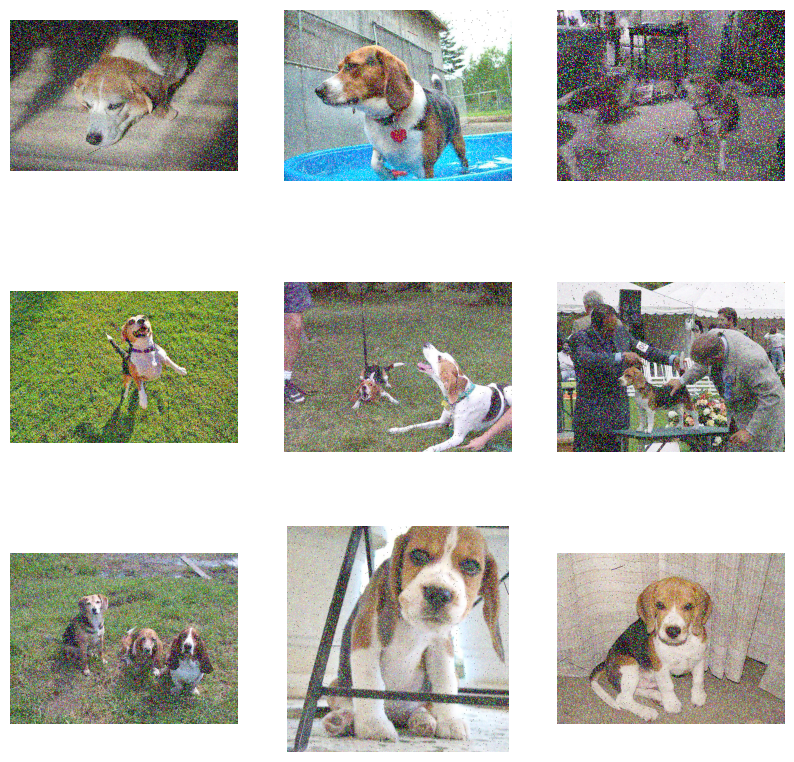

In [25]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import random 

path_to_dataset = '/kaggle/input/stanford-dogs-dataset/images/Images/'
dataset = []
''''
for root, dirs, files in os.walk(path_to_dataset):
    for file_name in files:
        img_path = os.path.join(root, file_name)
        try:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                dataset.append(img)
            else:
                print(f"Unable to read image: {img_path}")
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
'''

folder_name = 'n02088364-beagle'  
folder_path = os.path.join(path_to_dataset, folder_name)
if os.path.exists(folder_path):
    for file_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, file_name)
        try:
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                dataset.append(img)
            else:
                print(f"Unable to read image: {img_path}")
        except Exception as e:
            print(f"Error processing image {img_path}: {e}")
else:
    print(f"Folder '{folder_name}' not found in the dataset.")

def gaussian_noise(image, mean=0, sigma=1):  # Reduced sigma for less intense noise
    """
    Add Gaussian noise to the image.
    """
    noise = np.random.normal(mean, sigma, image.shape).astype('uint8')
    noisy_image = cv2.add(image, noise)
    return noisy_image

def salt_and_pepper(image, prob=0.009):  # Reduced probability for less intense salt-and-pepper noise
    """
    Add salt and pepper noise to the image.
    """
    noisy_image = np.copy(image)
    salt_pepper = np.random.rand(*image.shape[:2])
    noisy_image[salt_pepper < prob/2] = 0
    noisy_image[salt_pepper > 1 - prob/2] = 255
    return noisy_image

def add_smudge(image, scale=0.02):
    """
    Simulate smudges on the image.
    """
    smudge_mask = np.random.rand(*image.shape[:2]) < scale
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    image[smudge_mask] = blurred_image[smudge_mask]
    return image

def add_scratches(image, num_scratches=3):
    """
    Simulate scratches on the image.
    """
    h, w, _ = image.shape
    for _ in range(num_scratches):
        x = np.random.randint(0, w)
        y = np.random.randint(0, h)
        length = np.random.randint(5, 50)
        angle = np.random.randint(0, 180)
        thickness = np.random.randint(1, 2)
        cv2.line(image, (x, y), (x + int(length * np.cos(np.radians(angle))), y + int(length * np.sin(np.radians(angle)))), (0, 0, 0), thickness)
    return image

distorted_dataset = []
for image in dataset:
    distorted_image = add_smudge(image)
    distorted_image = add_scratches(distorted_image)
    distorted_image = gaussian_noise(image)
    distorted_image = salt_and_pepper(distorted_image)
    distorted_dataset.append(distorted_image)
    
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(distorted_dataset[i])
    plt.axis('off')
plt.show()